<a href="https://colab.research.google.com/github/MatheusR42/Python-NetworkX/blob/main/Food_Chain_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Food Chain Network

---


## Importing libs

In [86]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
import pydot
from networkx.drawing.nx_pydot import graphviz_layout


## Database

In [87]:
FOXES = "Foxes"
HAWKS_AND_OWLS = "Hawks\nand\nowls"
SNAKES = "Snakes"
RABBITS = "Rabbits"
SQUIRRELS = "Squirrels"
MICE = "Mice"
SEED_EATING_BIRDS = "Seed-eating\nbirds"
INSECTIVOROUS_BIRDS = "Insectivorous\nbirds"
TOADS = "Toads"
SPIDERS = "Spiders"
PREDACEOUS_INSECTS = "Predaceous\ninsects"
HERBIVOROUS_INSECTS = "Herbivorous\ninsects"
PLANTS = "Plants"

data = [
    (FOXES, {
      "eats": [RABBITS, SQUIRRELS, MICE, SEED_EATING_BIRDS, INSECTIVOROUS_BIRDS]
    }),
    (HAWKS_AND_OWLS, {
      "eats": [RABBITS, SQUIRRELS, MICE, SEED_EATING_BIRDS, INSECTIVOROUS_BIRDS]
    }),
    (SNAKES, {
      "eats": [MICE, SEED_EATING_BIRDS, INSECTIVOROUS_BIRDS, HERBIVOROUS_INSECTS, PREDACEOUS_INSECTS, TOADS]
    }),
    (INSECTIVOROUS_BIRDS, {
      "eats": [SPIDERS, HERBIVOROUS_INSECTS, PREDACEOUS_INSECTS]
    }),
    (TOADS, {
      "eats": [PREDACEOUS_INSECTS]
    }),
    (PREDACEOUS_INSECTS, {
      "eats": [HERBIVOROUS_INSECTS]
    }),
    (SPIDERS, {
      "eats": [PREDACEOUS_INSECTS, HERBIVOROUS_INSECTS]
    }),
    (HERBIVOROUS_INSECTS, {
      "eats": [PLANTS]
    }),
    (SEED_EATING_BIRDS, {
      "eats": [PLANTS]
    }),
    (MICE, {
      "eats": [PLANTS]
    }),
    (SQUIRRELS, {
      "eats": [PLANTS]
    }),
    (RABBITS, {
      "eats": [PLANTS]
    }),
    (PLANTS, {
      "eats": []
    }),
]

## Helper functions

In [88]:

def getEdges():
  edges = []
  for node in data:
    for animal in node[1]["eats"]:
      edges.append((animal, node[0]))
  
  return edges

def getLabels():
  dic = {}
  for node in data:
    dic[node[0]] = node[1]["name"]
  
  return dic

def getColors():
  return list(map(lambda node: node[1]["color"], data))

## Creating network graph

In [89]:
%%capture
G = nx.DiGraph()
G.add_nodes_from(data)
G.add_edges_from(getEdges())

## Plot

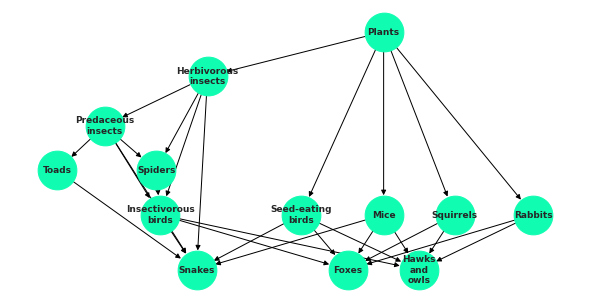

In [90]:
pos = nx.layout.spring_layout(G)

pos = graphviz_layout(G, prog="dot")
plt.figure(3,figsize=(8,4)) 
nx.draw(G, pos, with_labels=True, node_size=1500, font_size=9, node_color='#0ffcb1', font_color='#262626', font_weight='bold')
plt.show()

## Average Shortest Path

In [92]:
nx.average_shortest_path_length(G)

0.3782051282051282

## Diameter

In [95]:
# https://stackoverflow.com/questions/33114746/why-does-networkx-say-my-directed-graph-is-disconnected-when-finding-diameter
nx.diameter(G.to_undirected())

4